### Implement the Gradient Descent Algorithm. Give inputs as Learning Rate. Initial Position (x,y) Number of iterations. Print the output as the, Values generated in Each iteration.


In [44]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
X=df[["TV","radio","newspaper"]]
Y=df["sales"]
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [46]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.16699055823087827 Weights:  [0.0432299  0.12306174 0.29672808]


In [47]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 0.8558395 ,  0.44646182,  0.81714015,  0.69948825,  0.46007172,
        0.9153875 ,  0.10483627, -0.13513875, -0.480808  , -0.10516954])

In [48]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.8119652609569735

In [49]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.16699055823087827 theta:  [0.0432299  0.12306174 0.29672808]
After first update -Bias:  0.1636507470662607 theta:  [0.05746717 0.12994154 0.29445043]


0.8119652609569735

In [83]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=["iteration","cost"])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.062274770020571316 [0.31630705 0.29725127 0.22149219]


In [92]:
gd_iterations_df[0:15]

,iteration,cost
0,0.0,0.653964
1,10.0,0.633693
2,20.0,0.614194
3,30.0,0.595437
4,40.0,0.577392
5,50.0,0.560032
6,60.0,0.543330
7,70.0,0.527259
8,80.0,0.511796
9,90.0,0.496916


Text(0, 0.5, 'Cost or MSE')

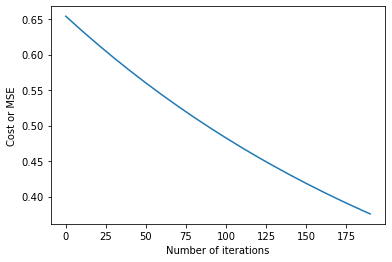

In [85]:
plt.plot(gd_iterations_df["iteration"],gd_iterations_df["cost"])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

In [88]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)

Final Estimate of b and theta :  2.774881806062011e-16 [ 0.75306591  0.53648155 -0.00433069]


In [89]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final Estimate of b and theta :  0.01335632985002742 [0.75312976 0.51837219 0.01540424]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

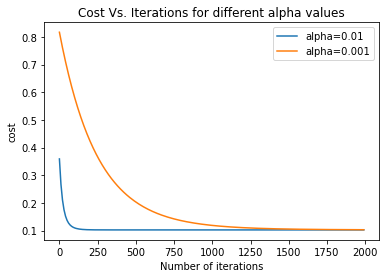

In [90]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')